# Winter 2021 Data Science Intern Challenge 
**Author: Krystian Dennis**

<a name="business-understanding"></a>
## Business Understanding

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

## [Library Installation](#libraries-and-functions)

- [Import Libraries](#import-libraries)
    
## [Import Data](#import-data)

- [Import and Explore Data](#import-dataset)
    
## [Exploratory Data Analysis](#eda)

- [Initial Look at Features](#initial-look)
  
## [Data Analysis](#data-analysis)

* [Question 1](#task-1)
* [Question 2](#task-2)

## Library Installation<a name="libraries-and-functions"></a>

In [1]:
#default libraries to import
import pandas as pd
import numpy as np

import missingno as msno 

from scipy import stats
from scipy.stats import t

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette('Set2')

from IPython.core.display import HTML # to modify the location of images

import warnings
warnings.filterwarnings("ignore")

print('All Libraries Imported')

All Libraries Imported


<a name="import-dataset"></a>
## Import and Explore Data

The dataset will be imported and we will take an initial look at the data.

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv',
                 delimiter=',', parse_dates=['created_at'], dtype={'payment_method':'category'})

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [4]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   category      
 6   created_at      5000 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(5)
memory usage: 239.4 KB


Let's look at the first five rows, last five rows, overall summary and 5-point statistics for the dataframe.

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [7]:
df.describe(include='category')

,payment_method
count,5000
unique,3
top,credit_card
freq,1735


<a name="eda"></a>
## [Exploratory Data Analysis](#eda)

We will have a look at all columns to determine values that need to be replaced, have look at the distribution of variables and discover any patterns in the data. We also find anomalies, too.

In [8]:
df['order_amount'].value_counts()

153    87
306    85
354    82
312    75
156    75
       ..
404     1
948     1
920     1
816     1
980     1
Name: order_amount, Length: 258, dtype: int64

<AxesSubplot:>

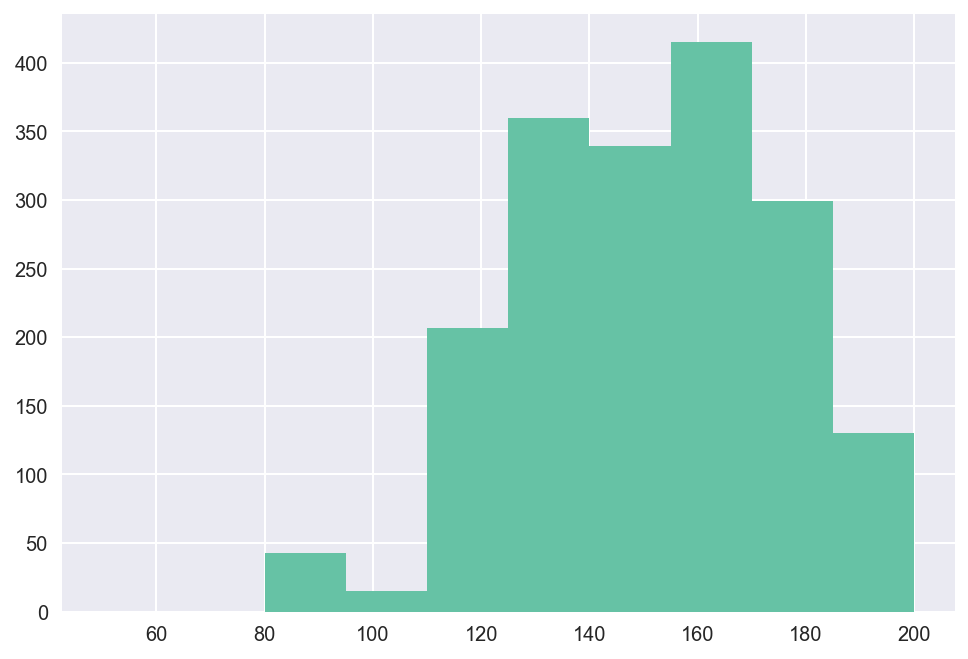

In [9]:
df['order_amount'].hist(range=(50,200))

<AxesSubplot:>

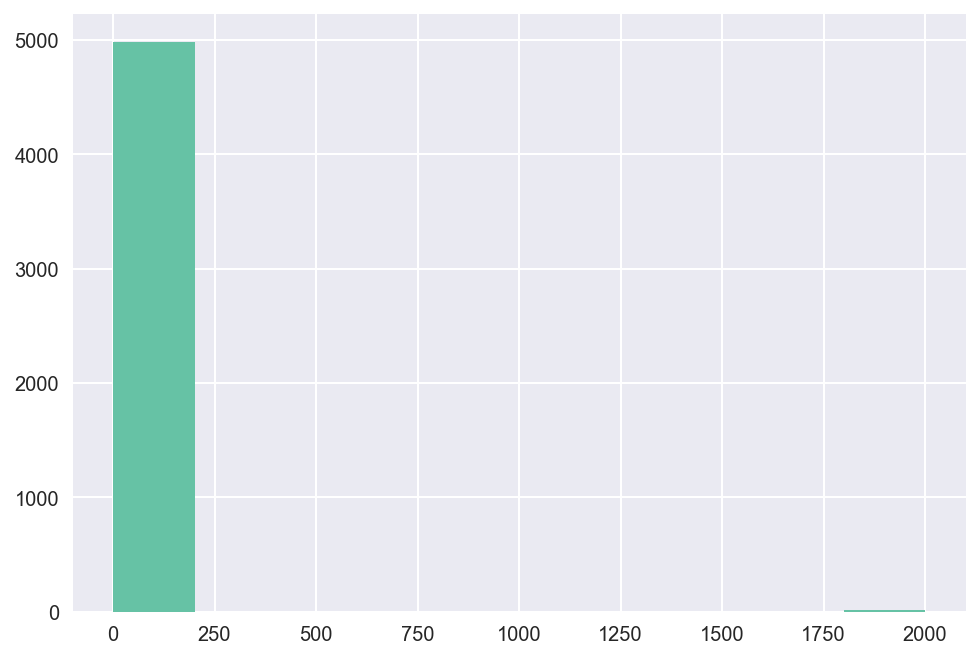

In [10]:
df['total_items'].hist()

In [11]:
df['order_amount'].min()

90

In [12]:
df['order_amount'].max()

704000

In [13]:
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [14]:
df['total_items'].min()

1

In [15]:
df['total_items'].max()

2000

<AxesSubplot:xlabel='payment_method', ylabel='count'>

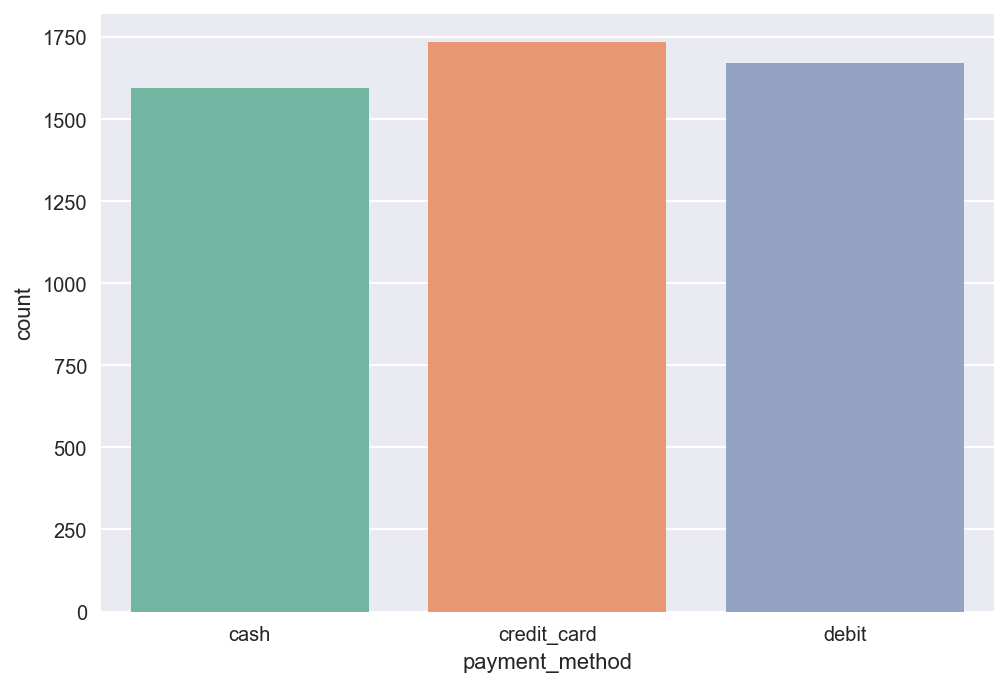

In [16]:
sns.countplot(x = df['payment_method'])

## Question 1<a name="task-1"></a>

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**a**.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Average order value was incorrectly calculated by summing the total revenue for all sneaker shops and dividing it by the total number of orders. 

In [17]:
bad_value = df['order_amount'].sum()/df['order_id'].count()
bad_value

3145.128

This yields an average order value of $3145.13.$ To correctly calculate average order value, the data is grouped by shop_id. 

$$Average\,Order\,Value = \displaystyle \Bigg[\frac{Total\,Revenue} {Total\,Orders}\Bigg]$$

In [18]:
orders_per_shop = df.groupby(['shop_id']).agg({'user_id':'nunique', 'order_id':'nunique',
                                               'total_items':'sum','order_amount':'sum'}).reset_index()
orders_per_shop.columns = ['shop_id','total_customers','total_orders','total_items','total_revenue']
orders_per_shop['average_order_value'] = (orders_per_shop['total_revenue']/orders_per_shop['total_orders']).round(2)

In [19]:
orders_per_shop = orders_per_shop.sort_values(by='average_order_value', ascending=False)
orders_per_shop.head()

,shop_id,total_customers,total_orders,total_items,total_revenue,average_order_value
41,42,31,51,34063,11990176,235101.49
77,78,45,46,88,2263800,49213.04
49,50,40,44,92,17756,403.55
89,90,45,49,111,19758,403.22
37,38,34,35,72,13680,390.86


**b**.	What metric would you report for this dataset?

$$Purchase\,Frequency = \displaystyle \Bigg[\frac{Total\,Orders} {Total\,Customers}\Bigg]$$

In [20]:
orders_per_shop['purchase_frequency'] = (orders_per_shop['total_orders']/orders_per_shop['total_customers']).round(2)

$$Customer\,Value = \displaystyle \Bigg[\frac{Average\,Order\,Value} {Purchase\,Frequency}\Bigg]$$

In [21]:
orders_per_shop['customer_value'] = (orders_per_shop['average_order_value']*orders_per_shop['purchase_frequency']).round(2)

$$Average\,Basket\,Size = \displaystyle \Bigg[\frac{Total\,Items} {Total\,Orders}\Bigg]$$

In [22]:
orders_per_shop['average_basket_size'] = (orders_per_shop['total_items']/orders_per_shop['total_orders']).round(2)

**c**.	What is its value?

In [23]:
orders_per_shop.head()

,shop_id,total_customers,total_orders,total_items,total_revenue,average_order_value,purchase_frequency,customer_value,average_basket_size
41,42,31,51,34063,11990176,235101.49,1.65,387917.46,667.90
77,78,45,46,88,2263800,49213.04,1.02,50197.30,1.91
49,50,40,44,92,17756,403.55,1.10,443.90,2.09
89,90,45,49,111,19758,403.22,1.09,439.51,2.27
37,38,34,35,72,13680,390.86,1.03,402.59,2.06


## Question 2<a name="task-2"></a>

a.	How many orders were shipped by Speedy Express in total?

```sql
SELECT 
	COUNT(OrderID) as cnt
FROM
	Orders
WHERE 
	ShipperID =
    	(SELECT
        	ShipperID
         FROM
         	Shippers
         WHERE
         	ShipperName = 'Speedy Express');  
```

**Answer**: 54

b.	What is the last name of the employee with the most orders?

```sql
SELECT
	Sub.LastName AS LastName
FROM
    (SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumberOfOrders
        FROM (Orders
    INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)
    GROUP BY LastName
    ORDER BY NumberOfOrders DESC
    LIMIT 1) AS Sub; 
```

**Answer**: Peacock

c.	What product was ordered the most by customers in Germany?

```sql
SELECT ProductName
FROM Products
WHERE ProductID IN
    (SELECT Sub.ProductID
    FROM
        (SELECT ProductID,
        COUNT(DISTINCT ProductID) as id_count
        FROM OrderDetails
        WHERE OrderID IN
            (SELECT
            OrderID
            FROM 
            Orders
            WHERE CustomerID IN
                (SELECT  
                CustomerID
                FROM Customers
                WHERE Country = 'Germany'))
                ORDER BY id_count
                LIMIT 1) AS Sub);
```

**Answer**: Boston Crab Meat